# Data Analysis in Geoscience Remote Sensing Projects: Exercises - 1
## Descriptive statistics 
Hendrik Andersen, contact: hendrik.andersen@kit.edu

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import spearmanr

# activate inline plotting within jupyterlab
%matplotlib inline

In [2]:
a = np.random.randn(1000)

__Task 1__

Plot a histogram of the array a.

Compute the
1. average, median, standard deviation, minimum, maximum, the interquartile range and the 5th and 95th percentile
2. What is the difference between mean and median and when would you apply each?
3. Shapiro-Wilks test from scipy.stats to test for normality of the distribution
4. Confidence interval of the mean, and describe what this is useful for
--> tip: for the last point, do a quick search on the internet to find a solution that uses the function tconfint_mean(), maybe stackoverflow will help

### Descriptive statistics in Pandas 
Pandas lets you conviniently apply functions relating to descriptive statistics on its dataframes.

In [3]:
# Read in data as pandas dataframe
df = pd.read_csv('Fremont.csv', index_col='Date', parse_dates=True)
df = df.rename(columns={"Fremont Bridge Total": "total", 
                        "Fremont Bridge East Sidewalk": "east",
                        "Fremont Bridge West Sidewalk": "west"}) 
df.mean() # Pandas computes the average for all columns in the dataframe 

total    107.240849
east      48.086623
west      59.154226
dtype: float64

<AxesSubplot:xlabel='Date'>

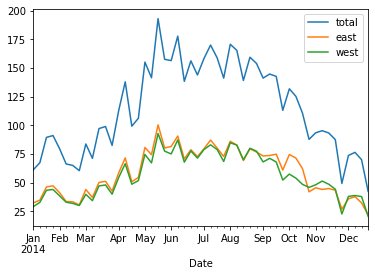

In [4]:
# Using resample, the resolution can be modified (here: temporal), check what resample('w').mean() means
df.resample('w').mean().loc['2014'].plot() 

<AxesSubplot:xlabel='Date'>

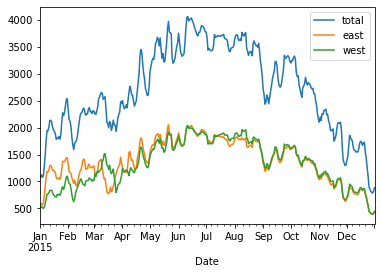

In [5]:
df.resample('d').sum().rolling(7).mean().loc['2015'].plot() # try to understand what exactly happens here

<AxesSubplot:xlabel='Date'>

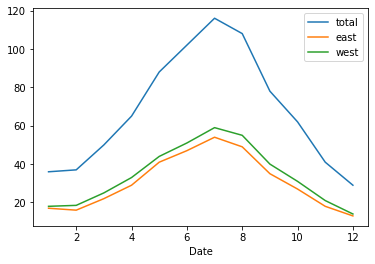

In [6]:
df.groupby(df.index.month).median().plot() # ... and here

__Task 2__

5. Plot the average number of cyclists over the course of a week (monday, tuesday, ...). Tip: Use groupby
6. Plot a 12-month rolling average
7. How many cyclists (total) have passed the bridge in January 2015?

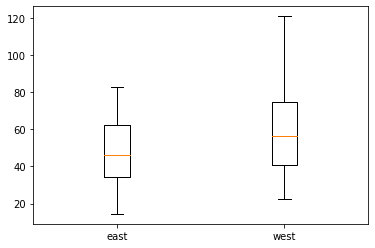

In [12]:
## Compare data groups and test differences for significance
# Visual comparison of two datasets using a boxplot
plt.boxplot([df['east'].resample('m').mean(),df['west'].resample('m').mean()],labels=['east','west'])
plt.show()

# The number of cyclists in western and eastern direction is different, but is the difference significant?.resample('m').mean()

__Task 3__ \
8. Check out the help of stats.ttest_ind: What exactly do the test results mean, and are the differences between X and y significant at the 0.05 level?

In [13]:
from scipy import stats
help(stats.ttest_ind)

Help on function ttest_ind in module scipy.stats._stats_py:

ttest_ind(a, b, axis=0, equal_var=True, nan_policy='propagate', permutations=None, random_state=None, alternative='two-sided', trim=0)
    Calculate the T-test for the means of *two independent* samples of scores.
    
    This is a test for the null hypothesis that 2 independent samples
    have identical average (expected) values. This test assumes that the
    populations have identical variances by default.
    
    Parameters
    ----------
    a, b : array_like
        The arrays must have the same shape, except in the dimension
        corresponding to `axis` (the first, by default).
    axis : int or None, optional
        Axis along which to compute test. If None, compute over the whole
        arrays, `a`, and `b`.
    equal_var : bool, optional
        If True (default), perform a standard independent 2 sample test
        that assumes equal population variances [1]_.
        If False, perform Welch's t-test, which